In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('C:/Geospetical/DATA/ML Assignment Dataset.csv', delimiter=';')
df.columns = ["Longitude", "Latitude"]

In [7]:
df.head()

Longitude  Latitude
0  36.861544 -5.177747
1  51.463766  5.392935
2  51.190492  4.453765
3  51.326247  6.085953
4  51.463766  5.392935

In [24]:
model = KMeans(n_clusters=5)
y_kmeans = model.fit_predict(df)

In [25]:
df['y'] = y_kmeans


In [26]:
df.head()

Longitude  Latitude  y
0  36.861544 -5.177747  0
1  51.463766  5.392935  3
2  51.190492  4.453765  4
3  51.326247  6.085953  3
4  51.463766  5.392935  3

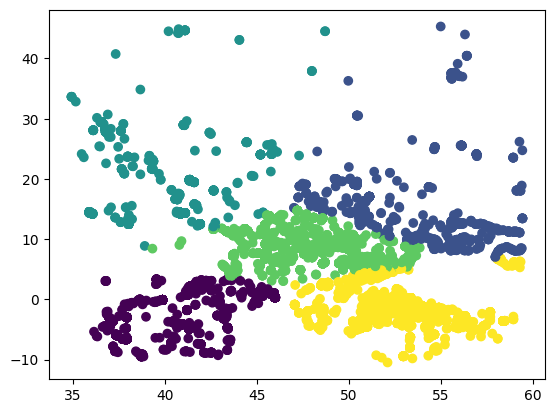

In [27]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['y'])

In [28]:
model.inertia_

197419.9240374045

In [29]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(df)
    wcss.append(model.inertia_)

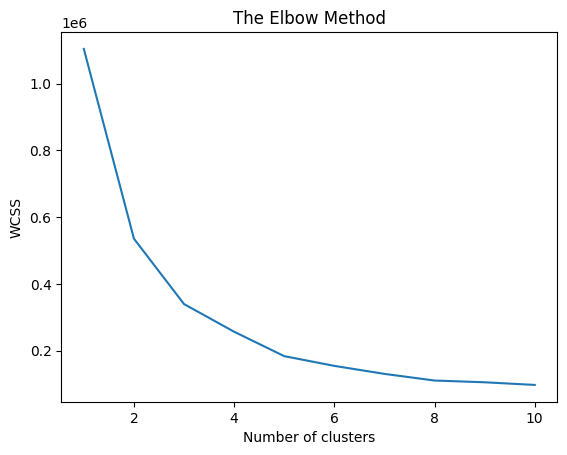

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  #within cluster sum of squares
plt.titile('The Elbow Method')
plt.show()

In [48]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Prepare data for clustering
X = df[['Longitude', 'Latitude']].values

# Define number of clusters for methods that require it
k = 5

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, df['KMeans_Cluster'])
kmeans_db = davies_bouldin_score(X, df['KMeans_Cluster'])

# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)
dbscan_silhouette = silhouette_score(X, df['DBSCAN_Cluster']) if len(set(dbscan.labels_)) > 1 else -1
dbscan_db = davies_bouldin_score(X, df['DBSCAN_Cluster']) if len(set(dbscan.labels_)) > 1 else -1

# 3. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=k)
df['Agglo_Cluster'] = agglo.fit_predict(X)
agglo_silhouette = silhouette_score(X, df['Agglo_Cluster'])
agglo_db = davies_bouldin_score(X, df['Agglo_Cluster'])

# 4. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=k, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X)
gmm_silhouette = silhouette_score(X, df['GMM_Cluster'])
gmm_db = davies_bouldin_score(X, df['GMM_Cluster'])

# Store evaluation results
clustering_results = {
    "Model": ["K-Means", "DBSCAN", "Agglomerative", "GMM"],
    "Silhouette Score": [kmeans_silhouette, dbscan_silhouette, agglo_silhouette, gmm_silhouette],
    "Davies-Bouldin Score": [kmeans_db, dbscan_db, agglo_db, gmm_db]
}

# Convert results to DataFrame
results_df = pd.DataFrame(clustering_results)
results_df


Model  Silhouette Score  Davies-Bouldin Score
0        K-Means          0.525513              0.845928
1         DBSCAN          0.418969              1.511105
2  Agglomerative          0.474113              0.907330
3            GMM          0.383049              1.280455

In [34]:
df = df[:2000]

cluster1 = df[['Latitude', 'Longitude']][df['y'] == 0].values.tolist()
cluster2 = df[['Latitude', 'Longitude']][df['y'] == 1].values.tolist()
cluster3 = df[['Latitude', 'Longitude']][df['y'] == 2].values.tolist()
cluster4 = df[['Latitude', 'Longitude']][df['y'] == 3].values.tolist()
cluster5 = df[['Latitude', 'Longitude']][df['y'] == 4].values.tolist()

In [37]:
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10, tiles='openstreetmap')   
map

In [46]:
for i in cluster1:
    folium.CircleMarker(location=[i[0], i[1]], radius=5, color='blue', fill=True, fill_color='lightblue').add_to(map)
    
for i in cluster2:
    folium.CircleMarker(location=[i[0], i[1]], radius=5, color='green', fill=True, fill_color='lightgreen').add_to(map)
    
for i in cluster3:
    folium.CircleMarker(location=[i[0], i[1]], radius=5, color='yellow', fill=True, fill_color='lightyellow').add_to(map)
    
for i in cluster4:
    folium.CircleMarker(location=[i[0], i[1]], radius=5, color='red', fill=True, fill_color='lightred').add_to(map)
    
for i in cluster5:
    folium.CircleMarker(location=[i[0], i[1]], radius=5, color='gray', fill=True, fill_color='lightgray').add_to(map)

In [47]:
map